# Surya


In [ ]:
!pip install surya-ocr
!pip install openvino-dev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2


In [ ]:
from PIL import Image
from surya.ocr import run_ocr
from surya.model.detection.model import load_model as load_det_model, load_processor as load_det_processor
from surya.model.recognition.model import load_model as load_rec_model
from surya.model.recognition.processor import load_processor as load_rec_processor


langs = ["en"] # Replace with your languages - optional but recommended
det_processor, det_model = load_det_processor(), load_det_model()
rec_model, rec_processor = load_rec_model(), load_rec_processor()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/675 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/154M [00:00<?, ?B/s]

Loaded detection model vikp/surya_det3 on device cuda with dtype torch.float16


config.json:   0%|          | 0.00/8.05k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/941M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

Loaded recognition model vikp/surya_rec2 on device cuda with dtype torch.float16


preprocessor_config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

In [ ]:
IMAGE_PATH = "/content/IMG_4915_1.jpeg"
image = Image.open(IMAGE_PATH)
predictions = run_ocr([image], [langs], det_model, det_processor, rec_model, rec_processor)
predictions

Recognizing Text: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


[OCRResult(text_lines=[TextLine(polygon=[[146.0, 41.0], [388.0, 31.0], [391.0, 66.0], [150.0, 76.0]], confidence=0.935546875, text='KHUYÊN MÃI', bbox=[146.0, 41.0, 388.0, 66.0]), TextLine(polygon=[[18.0, 101.0], [502.0, 74.0], [505.0, 98.0], [21.0, 125.0]], confidence=0.9931640625, text='MOC NHAT CAN XOAY MD02 400G VI', bbox=[18.0, 98.0, 502.0, 101.0]), TextLine(polygon=[[463.0, 113.0], [499.0, 113.0], [497.0, 192.0], [460.0, 192.0]], confidence=0.953125, text='5/11/2023', bbox=[463.0, 113.0, 499.0, 192.0]), TextLine(polygon=[[21.0, 134.0], [431.0, 111.0], [433.0, 132.0], [24.0, 155.0]], confidence=0.931640625, text='Giá khuyện mãi 15/11/2023-29/11/2023', bbox=[21.0, 132.0, 431.0, 134.0]), TextLine(polygon=[[240.0, 156.0], [456.0, 145.0], [462.0, 187.0], [245.0, 199.0]], confidence=0.9365234375, text='29.000', bbox=[240.0, 156.0, 456.0, 187.0]), TextLine(polygon=[[22.0, 166.0], [103.0, 163.0], [105.0, 182.0], [24.0, 186.0]], confidence=0.9619140625, text='33.000', bbox=[22.0, 166.0, 10

In [ ]:
from pathlib import Path
if not Path("./notebook_utils.py").exists():
    # Fetch `notebook_utils` module
    import requests

    r = requests.get(
        url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/utils/notebook_utils.py",
    )

    open("notebook_utils.py", "w").write(r.text)
import notebook_utils as utils

ModuleNotFoundError: No module named 'openvino'

In [ ]:
from PIL import Image, ImageDraw, ImageFont

# Sample OCR result
ocr_result = [
    {
        "text_lines": [
            {"polygon": [[146.0, 41.0], [388.0, 31.0], [391.0, 66.0], [150.0, 76.0]], "confidence": 0.9355930089950562, "text": "KHUYÊN MÃI", "bbox": [146.0, 41.0, 388.0, 66.0]},
            {"polygon": [[18.0, 101.0], [502.0, 74.0], [505.0, 98.0], [21.0, 125.0]], "confidence": 0.9928187727928162, "text": "MOC NHAT CAN XOAY MD02 400G VI", "bbox": [18.0, 98.0, 502.0, 101.0]},
            {"polygon": [[463.0, 113.0], [499.0, 113.0], [497.0, 192.0], [460.0, 192.0]], "confidence": 0.9530380368232727, "text": "5/11/2023", "bbox": [463.0, 113.0, 499.0, 192.0]},
            {"polygon": [[21.0, 134.0], [431.0, 111.0], [433.0, 132.0], [24.0, 155.0]], "confidence": 0.9317918419837952, "text": "Giá khuyện mãi 15/11/2023-29/11/2023", "bbox": [21.0, 132.0, 431.0, 134.0]},
            {"polygon": [[240.0, 156.0], [456.0, 145.0], [462.0, 187.0], [245.0, 199.0]], "confidence": 0.9366598129272461, "text": "29.000", "bbox": [240.0, 156.0, 456.0, 187.0]},
            {"polygon": [[22.0, 166.0], [103.0, 163.0], [105.0, 182.0], [24.0, 186.0]], "confidence": 0.961908221244812, "text": "33.000", "bbox": [22.0, 166.0, 103.0, 182.0]},
            {"polygon": [[42.0, 238.0], [220.0, 227.0], [222.0, 243.0], [44.0, 254.0]], "confidence": 0.9734926819801331, "text": "Tuong duong vnd", "bbox": [42.0, 238.0, 220.0, 243.0]},
            {"polygon": [[69.0, 259.0], [197.0, 254.0], [199.0, 270.0], [71.0, 275.0]], "confidence": 0.9371726512908936, "text": "29 000 / Cai", "bbox": [69.0, 259.0, 197.0, 270.0]},
            {"polygon": [[405.0, 285.0], [513.0, 287.0], [512.0, 304.0], [404.0, 302.0]], "confidence": 0.9827507138252258, "text": "01250958", "bbox": [405.0, 285.0, 513.0, 304.0]},
            {"polygon": [[174.0, 291.0], [237.0, 290.0], [238.0, 306.0], [174.0, 307.0]], "confidence": 0.8685178756713867, "text": "Ass: Y", "bbox": [174.0, 291.0, 237.0, 306.0]}
        ],
        "languages": ["en"],
        "image_bbox": [0.0, 0.0, 538.0, 343.0]
    }
]

# Load the image
image_path = '/content/IMG_4915_1.jpeg'  # Replace with your image path
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Load a font
font_path = utils.download_file(
    url="https://raw.githubusercontent.com/Halfish/lstm-ctc-ocr/master/fonts/simfang.ttf",
    directory="fonts",
)  # Replace with your font path
font_size = 16
font = ImageFont.truetype(font_path, font_size)

# Draw bounding boxes and text
for text_line in ocr_result[0]['text_lines']:
    bbox = text_line['bbox']
    text = text_line['text']

    # Draw bounding box
    draw.rectangle(bbox, outline="red", width=2)

    # Draw text
    text_position = (bbox[0], bbox[1] - font_size)  # Position text above the bounding box
    draw.text(text_position, text, fill="red", font=font)

# Save the image with annotations
output_image_path = 'output_image_with_annotations.jpg'
image.save(output_image_path)

print(f"Image with annotations saved to {output_image_path}")

fonts/simfang.ttf:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

Image with annotations saved to output_image_with_annotations.jpg


In [ ]:
for pred in predictions:
  bboxes = [l.bbox for l in pred.text_lines]
  pred_text = [l.text for l in pred.text_lines]

bboxes, pred_text

([[146.0, 41.0, 388.0, 66.0],
  [18.0, 98.0, 502.0, 101.0],
  [463.0, 113.0, 499.0, 192.0],
  [21.0, 132.0, 431.0, 134.0],
  [240.0, 156.0, 456.0, 187.0],
  [22.0, 166.0, 103.0, 182.0],
  [42.0, 238.0, 220.0, 243.0],
  [69.0, 259.0, 197.0, 270.0],
  [405.0, 285.0, 513.0, 304.0],
  [174.0, 291.0, 237.0, 306.0]],
 ['KHUYÊN MÃI',
  'MOC NHAT CAN XOAY MD02 400G VI',
  '5/11/2023',
  'Giá khuyện mãi 15/11/2023-29/11/2023',
  '29.000',
  '33.000',
  'Tuong duong vnd',
  '29 000 / Cai',
  '01250958',
  'Ass: Y'])

In [ ]:
from surya.detection import batch_text_detection
from surya.postprocessing.affinity import draw_lines_on_image
from surya.postprocessing.heatmap import draw_polys_on_image

IMAGE_PATH = "/content/IMG_4915_1.jpeg"
image = Image.open(IMAGE_PATH)
det_processor, det_model = load_det_processor(), load_det_model()
predictions = batch_text_detection([image], det_model, det_processor, include_maps=False)
predictions

Loaded detection model vikp/surya_det3 on device cuda with dtype torch.float16


Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


[TextDetectionResult(bboxes=[PolygonBox(polygon=[[146, 41], [388, 31], [391, 66], [150, 76]], confidence=0.9245795011520386, bbox=[146, 41, 388, 66]), PolygonBox(polygon=[[18, 101], [502, 74], [505, 98], [21, 125]], confidence=0.9848073720932007, bbox=[18, 98, 502, 101]), PolygonBox(polygon=[[463, 113], [499, 113], [497, 192], [460, 192]], confidence=0.8475311994552612, bbox=[463, 113, 499, 192]), PolygonBox(polygon=[[21, 134], [431, 111], [433, 132], [24, 155]], confidence=1.0, bbox=[21, 132, 431, 134]), PolygonBox(polygon=[[240, 156], [456, 145], [462, 187], [245, 199]], confidence=0.7542051076889038, bbox=[240, 156, 456, 187]), PolygonBox(polygon=[[22, 166], [103, 163], [105, 182], [24, 186]], confidence=0.9940314888954163, bbox=[22, 166, 103, 182]), PolygonBox(polygon=[[42, 238], [220, 227], [222, 243], [44, 254]], confidence=0.861638605594635, bbox=[42, 238, 220, 243]), PolygonBox(polygon=[[69, 259], [197, 254], [199, 270], [71, 275]], confidence=0.986977756023407, bbox=[69, 259, 

In [ ]:
predictions

[TextDetectionResult(bboxes=[PolygonBox(polygon=[[146, 41], [388, 31], [391, 66], [150, 76]], confidence=0.9245795011520386, bbox=[146, 41, 388, 66]), PolygonBox(polygon=[[18, 101], [502, 74], [505, 98], [21, 125]], confidence=0.9848073720932007, bbox=[18, 98, 502, 101]), PolygonBox(polygon=[[463, 113], [499, 113], [497, 192], [460, 192]], confidence=0.8475311994552612, bbox=[463, 113, 499, 192]), PolygonBox(polygon=[[21, 134], [431, 111], [433, 132], [24, 155]], confidence=1.0, bbox=[21, 132, 431, 134]), PolygonBox(polygon=[[240, 156], [456, 145], [462, 187], [245, 199]], confidence=0.7542051076889038, bbox=[240, 156, 456, 187]), PolygonBox(polygon=[[22, 166], [103, 163], [105, 182], [24, 186]], confidence=0.9940314888954163, bbox=[22, 166, 103, 182]), PolygonBox(polygon=[[42, 238], [220, 227], [222, 243], [44, 254]], confidence=0.861638605594635, bbox=[42, 238, 220, 243]), PolygonBox(polygon=[[69, 259], [197, 254], [199, 270], [71, 275]], confidence=0.986977756023407, bbox=[69, 259, 

In [ ]:
import copy
import os

for idx, (image, pred, name) in enumerate(zip([image], predictions, ["names"])):
    polygons = [p.polygon for p in pred.bboxes]
    bbox_image = draw_polys_on_image(polygons, copy.deepcopy(image))
    bbox_image.save("output_image_with_BB.jpg")

# Preprocesing

In [ ]:
!mkdir temp

In [ ]:
import cv2
image_file = "/content/IMG_4915_1.jpeg"
img = cv2.imread(image_file)

In [ ]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("temp/inverted.jpg", inverted_image)

True

In [ ]:
def grayScale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_image = grayScale(img)
thresh, im_bw = cv2.threshold(gray_image, 200, 230, cv2.THRESH_BINARY)
cv2.imwrite("temp/bw.jpg", im_bw)

True

In [ ]:
import numpy as np

def noiseRemoval(image):
    kernal = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernal, iterations=1)
    image = cv2.erode(image, kernal, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernal)
    image = cv2.medianBlur(image, 3)
    return image

no_noise = noiseRemoval(im_bw)
cv2.imwrite("temp/no_noise.jpg", no_noise)

True

In [ ]:
import numpy as np

#Erosion
def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return image

#Dilation
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return image

eroded_image = thin_font(no_noise)
dilate_image = thick_font(no_noise)
cv2.imwrite("temp/eroded_image.jpg", eroded_image)
cv2.imwrite("temp/dilate.jpg", dilate_image)

True

# PanNet

In [ ]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv-lite==2.1.0'
!mim install 'mmdet==3.2.0'
!mim install 'mmocr==1.0.1'

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.5.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.5.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.5.0/index.html
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.5.0/index.html
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmdet: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment


In [ ]:
import numpy as np
import cv2
from mmocr.apis import TextDetInferencer

class PANet:
    def __init__(self):
        # Load the model
        self._model = TextDetInferencer(model='PANet_CTW', weights='model/panet_ctw_20220826.pth')

    def detect_and_draw_boxes(self, image_path, output_path):
        # Perform text detection
        result = self._model(image_path)

        # Load the image using OpenCV
        img = cv2.imread(image_path)

        # Draw bounding boxes on the image
        for bbox in result['predictions'][0]['boundary_result']:
            points = np.array(bbox[:-1]).reshape(-1, 2).astype(int)
            cv2.polylines(img, [points], isClosed=True, color=(0, 255, 0), thickness=2)

        # Save the annotated image
        cv2.imwrite(output_path, img)
        print(f"Annotated image saved to {output_path}")

# Example usage
panet = PANet()
image_path = 'path_to_your_image.jpg'  # Replace with your image path
output_path = 'output_image_with_boxes.jpg'
panet.detect_and_draw_boxes(image_path, output_path)

KeyError: 'Adafactor is already registered in optimizer at torch.optim'

# EasyOCR

In [ ]:
!pip install easyocr
!pip install openvino-dev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 18.4 MB/s eta 0:00:00


In [ ]:
from pathlib import Path
if not Path("./notebook_utils.py").exists():
    # Fetch `notebook_utils` module
    import requests

    r = requests.get(
        url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/utils/notebook_utils.py",
    )

    open("notebook_utils.py", "w").write(r.text)
import notebook_utils as utils

In [ ]:
%%time
import easyocr
import cv2


def detect_and_draw_boxes(image_path, output_path):
    # Load the image
    img = cv2.imread(image_path)

    # Initialize the easyOCR reader
    reader = easyocr.Reader(['en'])  # Specify the language(s) you want to detect
    # Perform OCR
    results = reader.readtext(image_path)

    # Draw bounding boxes and text on the image
    for (bbox, text, prob) in results:
        # Extract coordinates
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        # Draw bounding box
        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

        # Put recognized text on the image
        # cv2.putText(img, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Save the annotated image
    cv2.imwrite(output_path, img)
    print(f"Annotated image saved to {output_path}")

# Example usage
image_path = '/content/IMG_4915_1.jpeg'  # Replace with your image path
output_path = 'output_image_with_boxes.jpg'
detect_and_draw_boxes(image_path, output_path)

Annotated image saved to output_image_with_boxes.jpg
CPU times: user 7.12 s, sys: 889 ms, total: 8.01 s
Wall time: 8.11 s


In [ ]:
%%time
img = cv2.imread(image_path)
reader = easyocr.Reader(['en'])
# Perform OCR
results = reader.readtext(image_path)
results

CPU times: user 6.31 s, sys: 741 ms, total: 7.05 s
Wall time: 7.11 s


[([[140, 23], [390, 23], [390, 86], [140, 86]],
  'KHUYEN MAI',
  0.9807326836718552),
 ([[88, 76], [506, 76], [506, 127], [88, 127]],
  'NHAT CAN XOAY MDOZ 4OOG VI',
  0.5432961381328646),
 ([[62, 106], [432, 106], [432, 160], [62, 160]],
  'khuyen mai 15/11/2023-29/11/2023',
  0.7634171073884654),
 ([[22, 132], [64, 132], [64, 158], [22, 158]], 'Gia', 0.9999434351921082),
 ([[234, 133], [472, 133], [472, 210], [234, 210]],
  '29.000',
  0.9999155619734553),
 ([[470, 101], [498, 101], [498, 206], [470, 206]], '1', 0.49753886131931324),
 ([[39, 223], [225, 223], [225, 259], [39, 259]],
  'Tuong duong vnd',
  0.9970763417088567),
 ([[70, 252], [146, 252], [146, 280], [70, 280]],
  '29 000',
  0.8157179405579522),
 ([[158, 248], [200, 248], [200, 274], [158, 274]], 'Cal', 0.5330632943554122),
 ([[300, 254], [404, 254], [404, 280], [300, 280]],
  '8"936036',
  0.940630440337203),
 ([[415, 253], [500, 253], [500, 282], [415, 282]],
  '834116',
  0.99999552263479),
 ([[172, 284], [240, 284]

# Doctr

In [ ]:
!pip uninstall -y tensorflow
!pip install python-doctr[torch,viz]

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.9/304.9 kB 20.2 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=727d61cfb92d26a60e79d4571624c037ddf82269c284708d3b104aeeb83623db
  Stored in directory: /root/.cache/p

In [ ]:
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-freefont-ttf
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,388 kB of archives.
After this operation, 6,653 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-freefont-ttf all 20120503-10build1 [2,388 kB]
Fetched 2,388 kB in 1s (2,486 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-freefont-ttf.
(Reading databa

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [ ]:
# Download a sample
# !wget https://eforms.com/download/2019/01/Cash-Payment-Receipt-Template.pdf
# Read the file
# doc = DocumentFile.from_pdf("Cash-Payment-Receipt-Template.pdf")
doc = DocumentFile.from_images("/content/IMG_4915_1.jpeg")
print(f"Number of pages: {len(doc)}")

Number of pages: 1


In [ ]:
predictor = ocr_predictor(pretrained=True)
# print(predictor)


/usr/local/lib/python3.10/dist-packages/doctr/models/utils/pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path, map_location="c

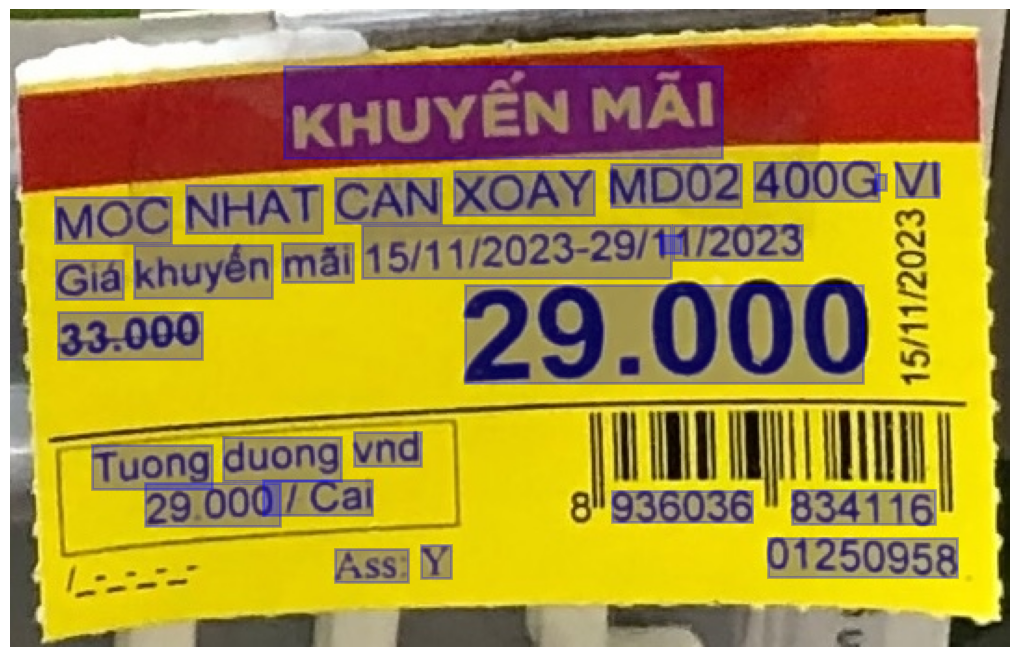

KHUYÉNMAI
CAN XOAY MD02 400G - VI
MOC NHAT
mai 15/11/2023-29/1 - 1/2023
Gia khuyên
33-.000
29.000
Tuong duong vnd
29.000 /Cai
936036
834116
Ass: Y
01250958
CPU times: user 6.86 s, sys: 941 ms, total: 7.8 s
Wall time: 7.63 s


In [ ]:
%%time
result = predictor(doc)
result.show()
string_result = result.render()
print(string_result)

# Paddle OCR

In [ ]:
%pip install -q "openvino>=2023.1.0"
import platform

if platform.system() == "Windows":
    %pip install -q "paddlepaddle>=2.5.1,<2.6.0"
else:
    %pip install -q "paddlepaddle>=2.5.1"
%pip install -q "pyclipper>=1.2.1" "shapely>=1.7.1" opencv-python tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import paddle
import math
import time
import collections
from PIL import Image
from pathlib import Path
import tarfile

import openvino as ov
from IPython import display
import copy

In [ ]:
# Import local modules

if not Path("./notebook_utils.py").exists():
    # Fetch `notebook_utils` module
    import requests

    r = requests.get(
        url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/utils/notebook_utils.py",
    )

    open("notebook_utils.py", "w").write(r.text)

if not Path("./pre_post_processing.py").exists():
    # Fetch `notebook_utils` module
    import requests

    r = requests.get(
        url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/refs/heads/latest/notebooks/paddle-ocr-webcam/pre_post_processing.py",
    )

    open("pre_post_processing.py", "w").write(r.text)
import notebook_utils as utils
import pre_post_processing as processing

In [ ]:
device = utils.device_widget()

device

Dropdown(description='Device:', index=1, options=('CPU', 'AUTO'), value='AUTO')

In [ ]:
# Define the function to download text detection and recognition models from PaddleOCR resources.


def run_model_download(model_url: str, model_file_path: Path) -> None:
    """
    Download pre-trained models from PaddleOCR resources

    Parameters:
        model_url: url link to pre-trained models
        model_file_path: file path to store the downloaded model
    """
    archive_path = model_file_path.absolute().parent.parent / model_url.split("/")[-1]
    if model_file_path.is_file():
        print("Model already exists")
    else:
        # Download the model from the server, and untar it.
        print("Downloading the pre-trained model... May take a while...")

        # Create a directory.
        utils.download_file(model_url, archive_path.name, archive_path.parent)
        print("Model Downloaded")

        file = tarfile.open(archive_path)
        res = file.extractall(archive_path.parent)
        file.close()
        if not res:
            print(f"Model Extracted to {model_file_path}.")
        else:
            print("Error Extracting the model. Please check the network.")

In [ ]:
# A directory where the model will be downloaded.

det_model_url = "https://storage.openvinotoolkit.org/repositories/openvino_notebooks/models/paddle-ocr/ch_PP-OCRv3_det_infer.tar"
det_model_file_path = Path("model/ch_PP-OCRv3_det_infer/inference.pdmodel")

run_model_download(det_model_url, det_model_file_path)

ch_PP-OCRv3_det_infer.tar:   0%|          | 0.00/3.65M [00:00<?, ?B/s]

Model Downloaded
Model Extracted to model/ch_PP-OCRv3_det_infer/inference.pdmodel.


In [ ]:
# Initialize OpenVINO Runtime for text detection.
core = ov.Core()
det_model = core.read_model(model=det_model_file_path)
det_compiled_model = core.compile_model(model=det_model, device_name=device.value)

# Get input and output nodes for text detection.
det_input_layer = det_compiled_model.input(0)
det_output_layer = det_compiled_model.output(0)

In [ ]:
rec_model_url = "https://storage.openvinotoolkit.org/repositories/openvino_notebooks/models/paddle-ocr/ch_PP-OCRv3_rec_infer.tar"
rec_model_file_path = Path("model/ch_PP-OCRv3_rec_infer/inference.pdmodel")

run_model_download(rec_model_url, rec_model_file_path)

ch_PP-OCRv3_rec_infer.tar:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Model Downloaded
Model Extracted to model/ch_PP-OCRv3_rec_infer/inference.pdmodel.


In [ ]:
# Read the model and corresponding weights from a file.
rec_model = core.read_model(model=rec_model_file_path)

# Assign dynamic shapes to every input layer on the last dimension.
for input_layer in rec_model.inputs:
    input_shape = input_layer.partial_shape
    input_shape[3] = -1
    rec_model.reshape({input_layer: input_shape})

rec_compiled_model = core.compile_model(model=rec_model, device_name="AUTO")

# Get input and output nodes.
rec_input_layer = rec_compiled_model.input(0)
rec_output_layer = rec_compiled_model.output(0)

In [ ]:
# Preprocess for text detection.
def image_preprocess(input_image, size):
    """
    Preprocess input image for text detection

    Parameters:
        input_image: input image
        size: value for the image to be resized for text detection model
    """
    img = cv2.resize(input_image, (size, size))
    img = np.transpose(img, [2, 0, 1]) / 255
    img = np.expand_dims(img, 0)
    # NormalizeImage: {mean: [0.485, 0.456, 0.406], std: [0.229, 0.224, 0.225], is_scale: True}
    img_mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
    img_std = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))
    img -= img_mean
    img /= img_std
    return img.astype(np.float32)

In [ ]:
# Preprocess for text recognition.
def resize_norm_img(img, max_wh_ratio):
    """
    Resize input image for text recognition

    Parameters:
        img: bounding box image from text detection
        max_wh_ratio: value for the resizing for text recognition model
    """
    rec_image_shape = [3, 48, 320]
    imgC, imgH, imgW = rec_image_shape
    assert imgC == img.shape[2]
    character_type = "ch"
    if character_type == "ch":
        imgW = int((32 * max_wh_ratio))
    h, w = img.shape[:2]
    ratio = w / float(h)
    if math.ceil(imgH * ratio) > imgW:
        resized_w = imgW
    else:
        resized_w = int(math.ceil(imgH * ratio))
    resized_image = cv2.resize(img, (resized_w, imgH))
    resized_image = resized_image.astype("float32")
    resized_image = resized_image.transpose((2, 0, 1)) / 255
    resized_image -= 0.5
    resized_image /= 0.5
    padding_im = np.zeros((imgC, imgH, imgW), dtype=np.float32)
    padding_im[:, :, 0:resized_w] = resized_image
    return padding_im


def prep_for_rec(dt_boxes, frame):
    """
    Preprocessing of the detected bounding boxes for text recognition

    Parameters:
        dt_boxes: detected bounding boxes from text detection
        frame: original input frame
    """
    ori_im = frame.copy()
    img_crop_list = []
    for bno in range(len(dt_boxes)):
        tmp_box = copy.deepcopy(dt_boxes[bno])
        img_crop = processing.get_rotate_crop_image(ori_im, tmp_box)
        img_crop_list.append(img_crop)

    img_num = len(img_crop_list)
    # Calculate the aspect ratio of all text bars.
    width_list = []
    for img in img_crop_list:
        width_list.append(img.shape[1] / float(img.shape[0]))

    # Sorting can speed up the recognition process.
    indices = np.argsort(np.array(width_list))
    return img_crop_list, img_num, indices


def batch_text_box(img_crop_list, img_num, indices, beg_img_no, batch_num):
    """
    Batch for text recognition

    Parameters:
        img_crop_list: processed detected bounding box images
        img_num: number of bounding boxes from text detection
        indices: sorting for bounding boxes to speed up text recognition
        beg_img_no: the beginning number of bounding boxes for each batch of text recognition inference
        batch_num: number of images for each batch
    """
    norm_img_batch = []
    max_wh_ratio = 0
    end_img_no = min(img_num, beg_img_no + batch_num)
    for ino in range(beg_img_no, end_img_no):
        h, w = img_crop_list[indices[ino]].shape[0:2]
        wh_ratio = w * 1.0 / h
        max_wh_ratio = max(max_wh_ratio, wh_ratio)
    for ino in range(beg_img_no, end_img_no):
        norm_img = resize_norm_img(img_crop_list[indices[ino]], max_wh_ratio)
        norm_img = norm_img[np.newaxis, :]
        norm_img_batch.append(norm_img)

    norm_img_batch = np.concatenate(norm_img_batch)
    norm_img_batch = norm_img_batch.copy()
    return norm_img_batch

In [ ]:
def post_processing_detection(frame, det_results):
    """
    Postprocess the results from text detection into bounding boxes

    Parameters:
        frame: input image
        det_results: inference results from text detection model
    """
    ori_im = frame.copy()
    data = {"image": frame}
    data_resize = processing.DetResizeForTest(data)
    data_list = []
    keep_keys = ["image", "shape"]
    for key in keep_keys:
        data_list.append(data_resize[key])
    img, shape_list = data_list

    shape_list = np.expand_dims(shape_list, axis=0)
    pred = det_results[0]
    if isinstance(pred, paddle.Tensor):
        pred = pred.numpy()
    segmentation = pred > 0.3

    boxes_batch = []
    for batch_index in range(pred.shape[0]):
        src_h, src_w, ratio_h, ratio_w = shape_list[batch_index]
        mask = segmentation[batch_index]
        boxes, scores = processing.boxes_from_bitmap(pred[batch_index], mask, src_w, src_h)
        boxes_batch.append({"points": boxes})
    post_result = boxes_batch
    dt_boxes = post_result[0]["points"]
    dt_boxes = processing.filter_tag_det_res(dt_boxes, ori_im.shape)
    return dt_boxes

In [ ]:
# Download font and a character dictionary for printing OCR results.
font_path = utils.download_file(
    url="https://raw.githubusercontent.com/Halfish/lstm-ctc-ocr/master/fonts/simfang.ttf",
    directory="fonts",
)
character_dictionary_path = utils.download_file(
    url="https://raw.githubusercontent.com/WenmuZhou/PytorchOCR/master/torchocr/datasets/alphabets/ppocr_keys_v1.txt",
    directory="fonts",
)

simfang.ttf:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

ppocr_keys_v1.txt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

In [ ]:
def run_paddle_ocr(source, flip=False, use_popup=False):
    """
    Main function to run the paddleOCR inference on a single image.

    Parameters:
        source: The path to the image file.
        flip: Not used for image processing.
        use_popup: False for showing encoded frames over this notebook, True for creating a popup window.
    """
    try:
        if not isinstance(source, str) or not os.path.isfile(source):
            raise ValueError("Invalid image source. Please provide a valid image file path.")

        # Load the image
        frame = cv2.imread(source)
        if frame is None:
            raise RuntimeError(f"Could not open image file: {source}")

        # If the frame is larger than full HD, reduce size to improve the performance.
        scale = 1280 / max(frame.shape)
        if scale < 1:
            frame = cv2.resize(
                src=frame,
                dsize=None,
                fx=scale,
                fy=scale,
                interpolation=cv2.INTER_AREA,
            )

        # Preprocess the image for text detection.
        test_image = image_preprocess(frame, 640)

        # Measure processing time for text detection.
        start_time = time.time()
        # Perform the inference step.
        det_results = det_compiled_model([test_image])[det_output_layer]
        stop_time = time.time()

        # Postprocessing for Paddle Detection.
        dt_boxes = post_processing_detection(frame, det_results)

        processing_time_det = (stop_time - start_time) * 1000

        # Preprocess detection results for recognition.
        dt_boxes = processing.sorted_boxes(dt_boxes)
        batch_num = 6
        img_crop_list, img_num, indices = prep_for_rec(dt_boxes, frame)

        # For storing recognition results, include two parts:
        # txts are the recognized text results, scores are the recognition confidence level.
        rec_res = [["", 0.0]] * img_num
        txts = []
        scores = []

        for beg_img_no in range(0, img_num, batch_num):
            # Recognition starts from here.
            norm_img_batch = batch_text_box(img_crop_list, img_num, indices, beg_img_no, batch_num)

            # Run inference for text recognition.
            rec_results = rec_compiled_model([norm_img_batch])[rec_output_layer]

            # Postprocessing recognition results.
            postprocess_op = processing.build_post_process(processing.postprocess_params)
            rec_result = postprocess_op(rec_results)
            for rno in range(len(rec_result)):
                rec_res[indices[beg_img_no + rno]] = rec_result[rno]
            if rec_res:
                txts = [rec_res[i][0] for i in range(len(rec_res))]
                scores = [rec_res[i][1] for i in range(len(rec_res))]

        image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        boxes = dt_boxes
        # Draw text recognition results beside the image.
        draw_img = processing.draw_ocr_box_txt(image, boxes, txts, scores, drop_score=0.5, font_path=str(font_path))

        # Visualize the PaddleOCR results.
        f_height, f_width = draw_img.shape[:2]
        fps = 1000 / processing_time_det
        cv2.putText(
            img=draw_img,
            text=f"Inference time: {processing_time_det:.1f}ms ({fps:.1f} FPS)",
            org=(20, 40),
            fontFace=cv2.FONT_HERSHEY_COMPLEX,
            fontScale=f_width / 1000,
            color=(0, 0, 255),
            thickness=1,
            lineType=cv2.LINE_AA,
        )

        # Use this workaround if there is flickering.
        if use_popup:
            draw_img = cv2.cvtColor(draw_img, cv2.COLOR_RGB2BGR)
            title = "Press ESC to Exit"
            cv2.namedWindow(winname=title, flags=cv2.WINDOW_GUI_NORMAL | cv2.WINDOW_AUTOSIZE)
            cv2.imshow(winname=title, mat=draw_img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            # Encode numpy array to jpg.
            draw_img = cv2.cvtColor(draw_img, cv2.COLOR_RGB2BGR)
            _, encoded_img = cv2.imencode(ext=".jpg", img=draw_img, params=[cv2.IMWRITE_JPEG_QUALITY, 100])
            # Create an IPython image.
            i = display.Image(data=encoded_img)
            # Display the image in this notebook.
            display.clear_output(wait=True)
            display.display(i)
        # any different error
    except RuntimeError as e:
        print(e)
    except ValueError as e:
        print(e)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

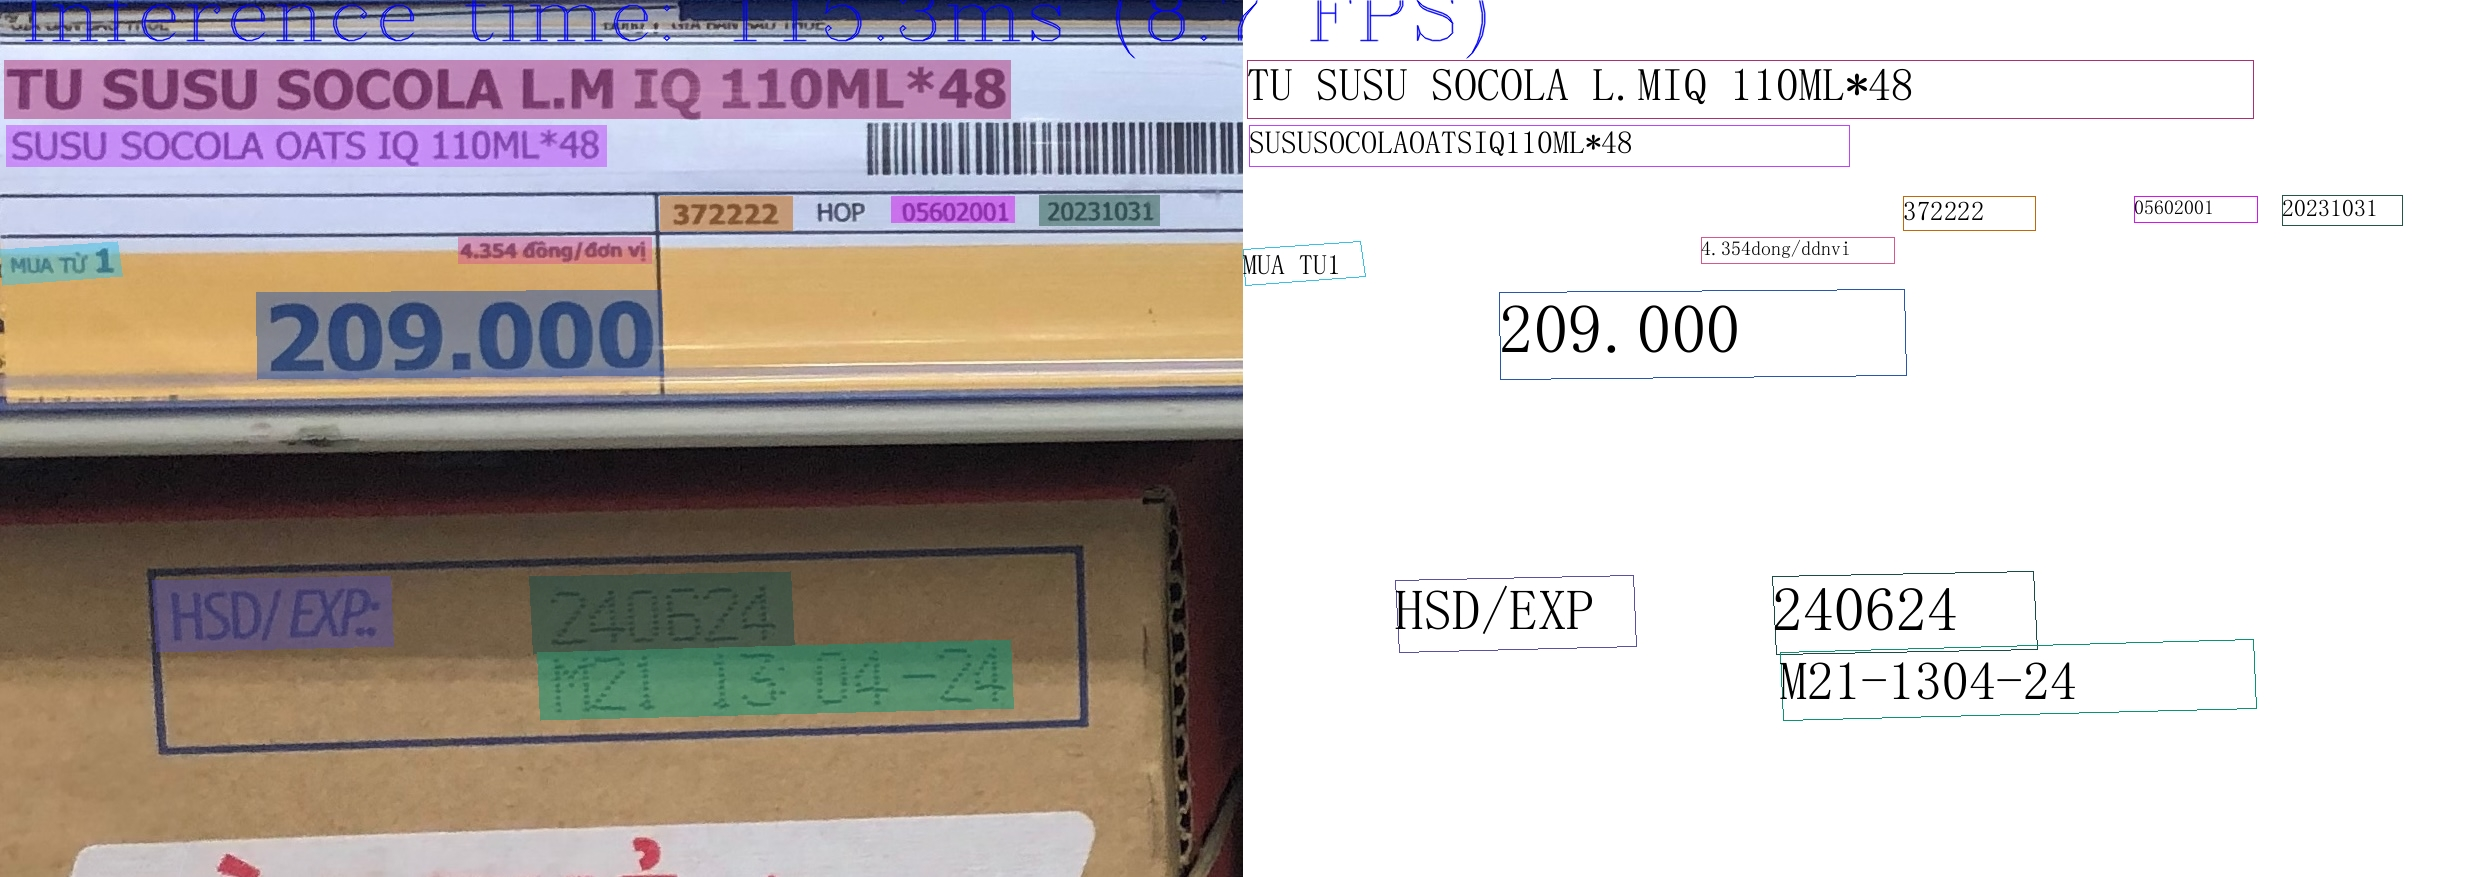

In [ ]:
Timport os
# Example usage:
image_path = "/content/IMG_5048_2.jpeg"  # Replace with the actual path to your image
run_paddle_ocr(source=image_path, use_popup=False)  # Set use_popup=True for a popup window